# Acidentes de Trânsito em Recife (com e sem vítimas) no ano de 2020

Inicialmente utilizei apenas dados do ano de 2020 mas a intenção é juntar com as bases dos outros anos. Como 2020 foi um ano atípico dos outros, verificar dados de anos anteriores pode trazer boas informações.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime
plt.style.use('ggplot')

#### Carregando dados

In [2]:
main_df = pd.read_csv('http://dados.recife.pe.gov.br/dataset/44087d2d-73b5-4ab3-9bd8-78da7436eed1/resource/fc1c8460-0406-4fff-b51a-e79205d1f1ab/download/acidentes_2020-novo.csv', sep=';')

#### Verificando a estrutura da base

In [3]:
main_df.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,2020-01-01,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,NaN,EM FRENTE A IGREJA UNIVERSAL,ÁGUA FRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,AV GENERAL SAN MARTIN,NaN,CORDEIRO,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,NaN,60 km/h,Dupla,Canteiro central,NaN,NaN
2,2020-01-01,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,AREIAS,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
3,2020-01-01,02:22:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,BOA VIAGEM,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,Única,Faixa seccionada,NaN,NaN
4,2020-01-01,03:33:00,SEM VÍTIMA,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,PAISSANDU,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,Faixa contínua,Faixa seccionada,Canteiro central


In [4]:
main_df.shape

(4092, 38)

In [5]:
main_df.columns

Index(['data', 'hora', 'natureza_acidente', 'situacao', 'bairro', 'endereco',
       'numero', 'detalhe_endereco_acidente', 'complemento',
       'bairro_cruzamento', 'num_semaforo', 'sentido_via', 'tipo', 'descricao',
       'auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao',
       'viatura', 'outros', 'vitimas', 'vitimasfatais', 'acidente_verificado',
       'tempo_clima', 'situacao_semaforo', 'sinalizacao', 'condicao_via',
       'conservacao_via', 'ponto_controle', 'situacao_placa',
       'velocidade_max_via', 'mao_direcao', 'divisao_via1', 'divisao_via2',
       'divisao_via3'],
      dtype='object')

##### Com o comando .info() se consegue verificar os tipos dos dados e a quantidade de dados não nulos

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data                       4092 non-null   object 
 1   hora                       4092 non-null   object 
 2   natureza_acidente          4091 non-null   object 
 3   situacao                   4091 non-null   object 
 4   bairro                     4058 non-null   object 
 5   endereco                   4079 non-null   object 
 6   numero                     2317 non-null   object 
 7   detalhe_endereco_acidente  1673 non-null   object 
 8   complemento                3614 non-null   object 
 9   bairro_cruzamento          4057 non-null   object 
 10  num_semaforo               1133 non-null   float64
 11  sentido_via                2845 non-null   object 
 12  tipo                       4092 non-null   object 
 13  descricao                  3988 non-null   objec

#### Carregando arquivo de metadados para realizar verificação do significado de cada coluna e facilitar a remoção de colunas desnecessárias

In [7]:
df = json.load(open('acidentes-de-transito.json', encoding='utf-8'))
campos_df = pd.DataFrame(df['metadados']['campos']).drop(['tamanho', 'valores_permitidos', 'tipo'], axis=1)
campos_df

,codigo,descricao
0,tipo,Tipo do Acidente se foi com ou sem vitimas
1,situacao,Situação do atendimento
2,data,data do atendimento
3,hora,hora do atendimento
4,bairro,Bairro do acidente
5,endereco,Endereço do acidente
6,numero,Número do acidente
7,complemento,Complemento do acidente
8,natureza,Tipo de Ocorrencia
9,descricao,Descrição do acidente


#### Ao revisar as colunas que não pertencem ao conjunto dos metadados e verificando o .info() do dataframe, percebi que a coluna "natureza_acidente" só possui uma linha nula. Dessa forma, ela informa se existiram vítimas (fatais ou não) no acidente em casos onde as colunas "vitimas" e "vitimasfatais" não possuem valor válido.

In [8]:
to_drop = list(filter(lambda x: x not in list(campos_df['codigo']), main_df.columns))
del(to_drop[0]) #retirando a coluna "natureza_acidente" do conjunto de colunas a serem excluídas.
to_drop

['detalhe_endereco_acidente',
 'bairro_cruzamento',
 'num_semaforo',
 'sentido_via',
 'acidente_verificado',
 'tempo_clima',
 'situacao_semaforo',
 'sinalizacao',
 'condicao_via',
 'conservacao_via',
 'ponto_controle',
 'situacao_placa',
 'velocidade_max_via',
 'mao_direcao',
 'divisao_via1',
 'divisao_via2',
 'divisao_via3']

In [9]:
main_df = main_df.drop(to_drop, axis=1)

In [10]:
main_df.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,complemento,tipo,descricao,...,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,2020-01-01,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,EM FRENTE A IGREJA UNIVERSAL,COLISÃO,COLISÃO ENTRE DOIS AUTOS S/V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2020-01-01,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,NaN,ABALROAMENTO LONGITUDINAL,COLISÃO ENTRE DOIS AUTOS S/V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2020-01-01,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,CHOQUE VEÍCULO PARADO,COLISÃO ENTRE DOIS AUTOS S/V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,2020-01-01,02:22:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,COLISÃO TRASEIRA,COLISÃO ENTRE DOIS AUTOS S/V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,2020-01-01,03:33:00,SEM VÍTIMA,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,ABALROAMENTO TRANSVERSAL,COLISÃOENTRE DOIS AUTOS S/V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


### Verificando elementos faltantes

In [11]:
# Quantidade de elementos faltantes por coluna
main_df.isna().sum()

data                    0
hora                    0
natureza_acidente       1
situacao                1
bairro                 34
endereco               13
numero               1775
complemento           478
tipo                    0
descricao             104
auto                  608
moto                 2400
ciclom               4073
ciclista             3940
pedestre             3937
onibus               3601
caminhao             3797
viatura              4020
outros               4032
vitimas                14
vitimasfatais        4071
dtype: int64

In [12]:
main_df['natureza_acidente'].value_counts()

SEM VÍTIMA      2317
COM VÍTIMA      1754
VÍTIMA FATAL      20
Name: natureza_acidente, dtype: int64

#### Para os casos que ocorrem vitimas fatais percebe-se nos dados presentes que a média, mediana e moda da quantidade de vítimas em cada caso é sempre igual a 1. Então nas entradas onde ocorreram vítimas fatais mas a quantidade não está presente, vou imputar o valor de 1.

In [13]:
def getVitimasFatais(x):
    if x == "VÍTIMA FATAL":
        return 1
    else:
        return 0

In [14]:
main_df['vitimasfatais'] = main_df['natureza_acidente'].apply(getVitimasFatais)

#### O mesmo acontece com a coluna de vítimas no geral, média, mediana e moda em casos onde há vítimas é igual a 1. Então os casos em que há vítimas mas não possuem a quantidade, serão preenchidos com um

In [15]:
vitimas_notna = main_df[main_df['vitimas'].notna() & main_df['vitimas'] >0 ]
print(vitimas_notna['vitimas'].mean())
print(vitimas_notna['vitimas'].median())
print(vitimas_notna['vitimas'].mode())

1.1855845629965949
1.0
0    1.0
dtype: float64


In [16]:
main_df['vitimas'].fillna(1, inplace=True)
main_df['vitimas'].value_counts()

0.0    2316
1.0    1488
2.0     258
3.0      24
5.0       3
4.0       3
Name: vitimas, dtype: int64

In [17]:
a = main_df[main_df['natureza_acidente'] == 'SEM VÍTIMA']
b = a[a['vitimas'] == 1]
b

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,complemento,tipo,descricao,...,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
3321,2020-09-21,08:54:00,SEM VÍTIMA,FINALIZADA,PINA,AV ANTONIO DE GOES,NaN,INÍCIO DA PONTE GOVERNADOR PAULO GUERRA,CHOQUE OBJETO FIXO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0


In [18]:
main_df.loc[3321, ['vitimas']] = 0
main_df['vitimas'][3321]

0.0

In [19]:
main_df['vitimas'].value_counts()

0.0    2317
1.0    1487
2.0     258
3.0      24
5.0       3
4.0       3
Name: vitimas, dtype: int64

In [20]:
# removendo a única linha da tabela onde a natureza do acidente é nula
main_df = main_df[main_df['natureza_acidente'].notna()]

In [21]:
# agora as colunas modificadas não possuem mais valores nulos
main_df.isna().sum()

data                    0
hora                    0
natureza_acidente       0
situacao                0
bairro                 34
endereco               13
numero               1774
complemento           478
tipo                    0
descricao             104
auto                  608
moto                 2399
ciclom               4072
ciclista             3939
pedestre             3936
onibus               3601
caminhao             3796
viatura              4019
outros               4031
vitimas                 0
vitimasfatais           0
dtype: int64

#### Como na coluna de bairros existem apenas 34 elementos sem valor, optei por remover essas linhas do dataframe

In [22]:
main_df = main_df[main_df['bairro'].notna()]
main_df.shape

(4057, 21)

In [23]:
main_df.isna().sum()

data                    0
hora                    0
natureza_acidente       0
situacao                0
bairro                  0
endereco               12
numero               1755
complemento           471
tipo                    0
descricao             102
auto                  605
moto                 2368
ciclom               4038
ciclista             3905
pedestre             3902
onibus               3572
caminhao             3766
viatura              3985
outros               3997
vitimas                 0
vitimasfatais           0
dtype: int64

In [24]:
main_df = main_df.drop(['endereco', 'numero', 'complemento', 'descricao', 'situacao', 'hora'], axis=1)

#### Pela descrição da base e observando seus valores, percebe-se que nas colunas referentes ao tipo de envolvido em um acidente, o elemento faltante significa que não houve envolvimento no acidente. Dessa forma, elementos faltantes serão substituidos por 0.

In [25]:
envolvidos = ['auto','moto','ciclom', 'ciclista','pedestre','onibus','caminhao','viatura', 'outros']

In [26]:
for col in envolvidos:
    main_df[col].fillna(0, inplace=True)

In [27]:
main_df.isna().sum()

data                 0
natureza_acidente    0
bairro               0
tipo                 0
auto                 0
moto                 0
ciclom               0
ciclista             0
pedestre             0
onibus               0
caminhao             0
viatura              0
outros               0
vitimas              0
vitimasfatais        0
dtype: int64

### Verificando e alterando tipos

In [28]:
main_df.dtypes

data                  object
natureza_acidente     object
bairro                object
tipo                  object
auto                 float64
moto                 float64
ciclom               float64
ciclista             float64
pedestre             float64
onibus               float64
caminhao             float64
viatura              float64
outros               float64
vitimas              float64
vitimasfatais          int64
dtype: object

In [29]:
def toDateTime(x):
    data=datetime.datetime.strptime(x, "%Y-%m-%d")
    return data

In [30]:
main_df['data'] = main_df['data'].apply(toDateTime)
main_df['bairro'] = main_df['bairro'].astype('category')
main_df['natureza_acidente'] = main_df['natureza_acidente'].astype('category')

#### Em tipos de acidentes tempos tipos diferentes para casos em que podemos agrupar em uma única categoria
Colisão, Choque, Abalroamento...

In [31]:
main_df['tipo'].value_counts()

COLISÃO                      996
ABALROAMENTO LONGITUDINAL    955
COLISÃO TRASEIRA             663
ABALROAMENTO TRANSVERSAL     636
COLISÃO FRONTAL              150
ATROPELAMENTO                148
CHOQUE OBJETO FIXO           146
COLISÃO COM CICLISTA         140
CHOQUE VEÍCULO PARADO        100
TOMBAMENTO                    39
CHOQUE                        31
ENGAVETAMENTO                 23
CAPOTAMENTO                   13
ACID. DE PERCURSO             11
ATROPELAMENTO ANIMAL           6
Name: tipo, dtype: int64

In [32]:
def renameTypes(x):
    if x in ['COLISÃO', 'COLISÃO TRASEIRA', 'COLISÃO FRONTAL', 'COLISÃO COM CICLISTA']:
        return 'COLISÃO'
    elif x in ['ABALROAMENTO LONGITUDINAL','ABALROAMENTO TRANSVERSAL']:
        return 'ABALROAMENTO'
    elif x in ['CHOQUE OBJETO FIXO', 'CHOQUE VEÍCULO PARADO', 'CHOQUE']:
        return 'CHOQUE'
    else:
        return x

In [33]:
# aplica generalização 
main_df['tipo'] = main_df['tipo'].apply(renameTypes)

In [34]:
main_df['tipo'].value_counts()

COLISÃO                 1949
ABALROAMENTO            1591
CHOQUE                   277
ATROPELAMENTO            148
TOMBAMENTO                39
ENGAVETAMENTO             23
CAPOTAMENTO               13
ACID. DE PERCURSO         11
ATROPELAMENTO ANIMAL       6
Name: tipo, dtype: int64

#### Considerando interessante ter informação de como o número de acidentes se comportou durante o ano, foi gerada uma nova coluna com os meses

In [35]:
def getMonth(x):
    return x.strftime("%B")

main_df['mes'] = main_df['data'].apply(getMonth)

In [36]:
#alterando a coluna para o tipo category
main_df['tipo'] = main_df['tipo'].astype('category')
main_df.head()

,data,natureza_acidente,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,mes
0,2020-01-01,SEM VÍTIMA,ÁGUA FRIA,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,January
1,2020-01-01,SEM VÍTIMA,CORDEIRO,ABALROAMENTO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,January
2,2020-01-01,SEM VÍTIMA,AREIAS,CHOQUE,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,January
3,2020-01-01,SEM VÍTIMA,BOA VIAGEM,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,January
4,2020-01-01,SEM VÍTIMA,PAISSANDU,ABALROAMENTO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,January


#### Descrição estatística dos valores númericos da base de dados

In [37]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
auto,4057.0,1.252157,0.786512,0.0,1.0,1.0,2.0,6.0
moto,4057.0,0.452305,0.567231,0.0,0.0,0.0,1.0,3.0
ciclom,4057.0,0.004683,0.068282,0.0,0.0,0.0,0.0,1.0
ciclista,4057.0,0.037959,0.193684,0.0,0.0,0.0,0.0,2.0
pedestre,4057.0,0.042149,0.227429,0.0,0.0,0.0,0.0,5.0
onibus,4057.0,0.121518,0.333490,0.0,0.0,0.0,0.0,3.0
caminhao,4057.0,0.073453,0.267444,0.0,0.0,0.0,0.0,2.0
viatura,4057.0,0.017994,0.134786,0.0,0.0,0.0,0.0,2.0
outros,4057.0,0.015282,0.126644,0.0,0.0,0.0,0.0,2.0
vitimas,4057.0,0.517624,0.660410,0.0,0.0,0.0,1.0,5.0


In [38]:
percent_envolvidos = []
for i in envolvidos:
    percent_envolvidos.append(main_df[i].sum() * 100/len(main_df))

### Visualizando a taxa de envolvimento em acidentes, se percebe que de acordo com os registros, cada caso terá no mínimo um automóvel envolvido. 

Text(0, 0.5, '% de acidentes')

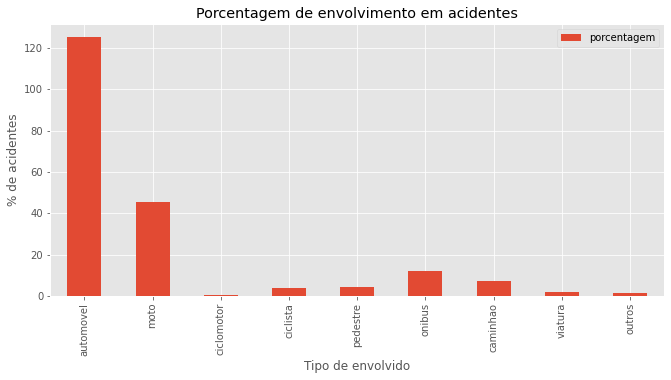

In [39]:
envolvidos = ['automovel','moto','ciclomotor', 'ciclista','pedestre','onibus','caminhao','viatura', 'outros']
df_envolvidos = pd.DataFrame({'envolvido': envolvidos, 'porcentagem': percent_envolvidos})
df_envolvidos.plot(kind='bar', figsize=(11,5), x='envolvido', y='porcentagem')
plt.title("Porcentagem de envolvimento em acidentes")
plt.xlabel("Tipo de envolvido")
plt.ylabel("% de acidentes")

#### Tipos definidos

In [41]:
main_df['mes'] = main_df['mes'].astype('category')
main_df.dtypes

data                 datetime64[ns]
natureza_acidente          category
bairro                     category
tipo                       category
auto                        float64
moto                        float64
ciclom                      float64
ciclista                    float64
pedestre                    float64
onibus                      float64
caminhao                    float64
viatura                     float64
outros                      float64
vitimas                     float64
vitimasfatais                 int64
mes                        category
dtype: object

## Visualização

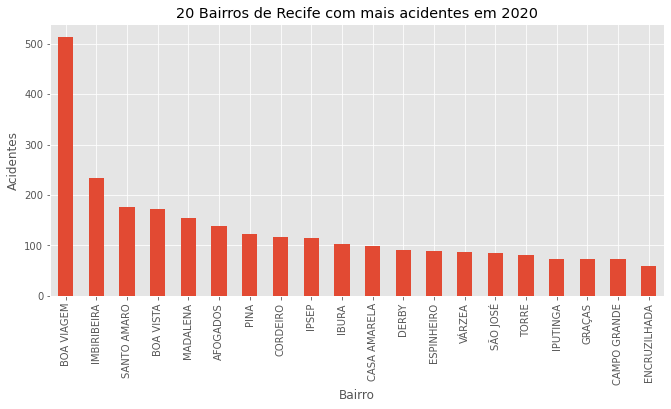

In [42]:
main_df['bairro'].value_counts().head(20).plot(kind='bar', figsize=(11,5))
plt.title("20 Bairros de Recife com mais acidentes em 2020")
plt.xlabel("Bairro")
plt.ylabel("Acidentes")

plt.show()

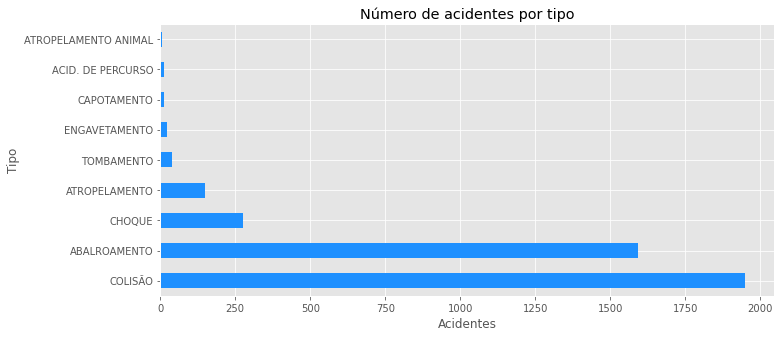

In [43]:
main_df['tipo'].value_counts().plot(kind='barh', figsize=(11,5), color='dodgerblue')
plt.title("Número de acidentes por tipo")
plt.xlabel("Acidentes")
plt.ylabel("Tipo")

plt.show()

### Neste gráfico se percebe que o número de acidentes foi maior nos primeiros meses do ano, justamente no período pré pandemia.

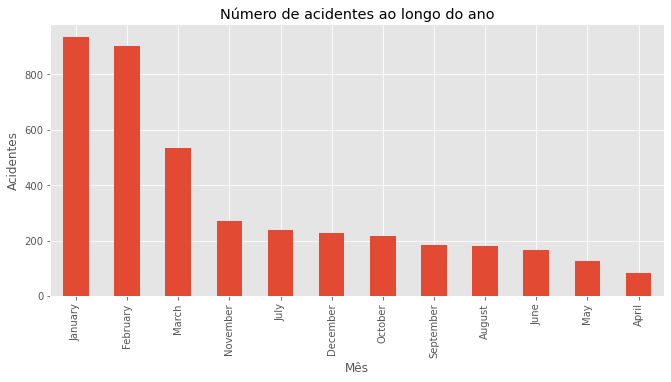

In [44]:
main_df['mes'].value_counts().plot(kind='bar', figsize=(11,5))
plt.title("Número de acidentes ao longo do ano")
plt.xlabel("Mês")
plt.ylabel("Acidentes")

plt.show()

Text(0, 0.5, 'Acidentes')

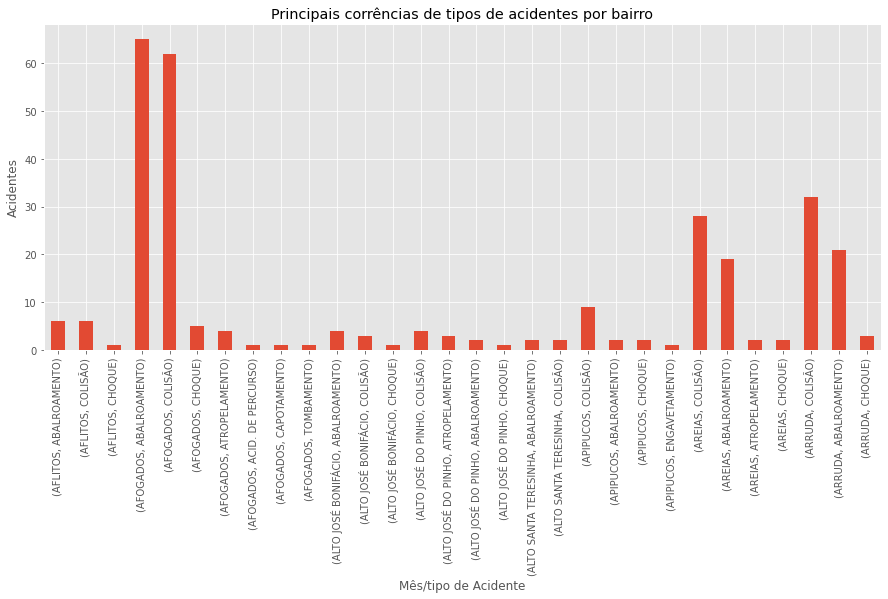

In [45]:
main_df.groupby(u'bairro')['tipo'].value_counts().head(30).plot(kind='bar', figsize=(15,6))
plt.title("Principais corrências de tipos de acidentes por bairro")
plt.xlabel("Mês/tipo de Acidente")
plt.ylabel("Acidentes")

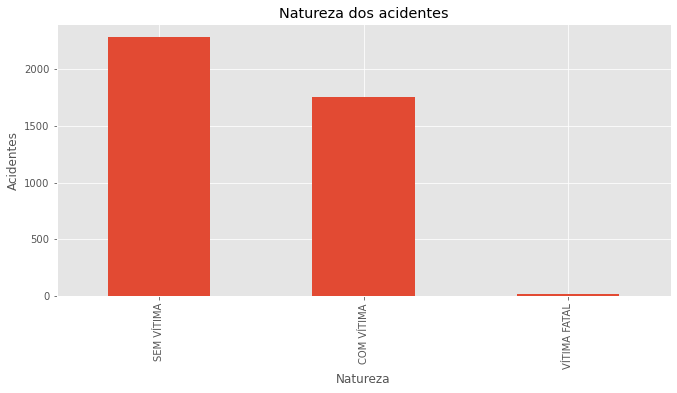

In [46]:
main_df['natureza_acidente'].value_counts().plot(kind='bar', figsize=(11,5))
plt.title("Natureza dos acidentes")
plt.xlabel("Natureza")
plt.ylabel("Acidentes")

plt.show()

## Adicionando quantitavo de acidentes por bairro ao mapa da cidade

Com uso da biblioteca Folium e arquivo geojson disponível no site de dados abertos da cidade, foi possível gerar a visualização de como a quantidade de casos se espalha pela cidade de acordo com o bairro.

In [47]:
import folium 
from branca.colormap import linear

In [48]:
# Importando arquivo geojson que contem a divisão da cidade por bairros 
with open('Mapa/bairros.json', 'r', encoding='utf-8-sig') as f:
    maprecife = json.load(f)

In [49]:
# visualizando os bairros no mapa
recifediv = folium.Map(location=[-8.05428, -34.8813],tiles='OpenStreetMap', zoom_start=12)
folium.GeoJson(
    maprecife
).add_to(recifediv)
recifediv

No arquivo geojson os nomes dos bairros não são acentuados, diferente da base de dados principal onde os nomes dos bairros são acentuados. Então se aplica a função criada para remover a acentuação e não ocorrer erros de match na hora de adicionar os dados ao mapa.

In [50]:
from unidecode import unidecode

def removeAcentuacao(x):
    return unidecode(x)

main_df['bairro'] = main_df['bairro'].apply(removeAcentuacao)

In [51]:
# transformando a série que contém os bairros e quantidade de acidentes em um dataframe que será usado para plotar o mapa
serie_acidentes_bairro = main_df['bairro'].value_counts()
acidentes_por_bairro = pd.DataFrame({'bairro':serie_acidentes_bairro.index, 'acidentes':serie_acidentes_bairro.values}) 

In [52]:
# foi preciso converter de volta o tipo da coluna bairro para poder realizar a junção dos bairros que estavam em falta
acidentes_por_bairro['bairro'] = acidentes_por_bairro['bairro'].astype('object') 

#### Adicionando bairros faltantes no dataframe que contém os acidentes, para este bairro o número de ocorrências será zero.

In [53]:
def changePoco(x):
    if x == 'POCO DA PANELA':
        return 'POCO'
    else:
        return x
    
acidentes_por_bairro['bairro'] = acidentes_por_bairro['bairro'].apply(changePoco)

In [54]:
bairros = []
for i in maprecife['features']:
    bairros.append(i['properties']['bairro_nome_ca'])
len(bairros)

94

In [55]:
bairros_in_df = acidentes_por_bairro['bairro'].tolist()
len(bairros_in_df)

91

In [56]:
toadd_df = pd.DataFrame([['PEIXINHOS', 0],['ALTO DO MANDU', 0], ['ALTO SANTA TEREZINHA', 0], ['PAU FERRO', 0], ['RECIFE', 0]], columns=['bairro', 'acidentes'])
toadd_df

,bairro,acidentes
0,PEIXINHOS,0
1,ALTO DO MANDU,0
2,ALTO SANTA TEREZINHA,0
3,PAU FERRO,0
4,RECIFE,0


In [57]:
acidentes_por_bairro = acidentes_por_bairro.append(toadd_df, ignore_index=True)
acidentes_por_bairro

,bairro,acidentes
0,BOA VIAGEM,513
1,IMBIRIBEIRA,234
2,SANTO AMARO,176
3,BOA VISTA,172
4,MADALENA,154
...,...,...
91,PEIXINHOS,0
92,ALTO DO MANDU,0
93,ALTO SANTA TEREZINHA,0
94,PAU FERRO,0


In [58]:
acidentes_por_bairro.shape

(96, 2)

In [59]:
# instanciando mapa de Recife
recife = folium.Map(location=[-8.05428, -34.8813],tiles='OpenStreetMap', zoom_start=12)

In [60]:
# Adicionando dados ao mapa criado

folium.Choropleth(
    geo_data=maprecife,
    data=acidentes_por_bairro,
    columns=["bairro", "acidentes"],
    key_on="feature.properties.bairro_nome_ca",
    legend_name="Acidentes por Bairro",
    highlight=True,
    fill_color="OrRd",
).add_to(recife)

### Aqui o mapa é exibido. Por alguma incompatibilidade, às vezes o github não o exibe e por isso disponibilizei, na pasta "Mapa" do projeto, o arquivo html do mapa para ser visto de forma interativa no navegador e também uma imagem do mesmo.

In [61]:
recife

In [62]:
#recife.save('index.html')